In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from braket.ahs.atom_arrangement import AtomArrangement

In [4]:
def Graph_gen(n_nodos, atoms_w, atoms_l, scale):
    '''Genera un grafo en una cuadrícula bidimensional de anchura atoms_w y altura atoms_l,
       conectando cada nodo con sus primeros vecinos y nodos diagonales, y luego elimina
       nodos aleatorios hasta que el número de nodos sea n_nodos.
    
    Args:
        n_nodos (int): Número final de nodos en el grafo.
        atoms_w (int): Anchura de la cuadrícula.
        atoms_l (int): Altura de la cuadrícula.
        scale (int): Escala de la cuadrícula para dibujar el grafo.
    
    Returns:
        G (Graph): Grafo de NetworkX con nodos conectados a sus primeros vecinos y nodos diagonales.
        register (AtomArrangement): Arrangement de átomos en la cuadrícula.
    '''
    # Crear el grafo en una cuadrícula 2D
    G = nx.grid_2d_graph(atoms_w, atoms_l)
    
    # Conectar nodos diagonales
    for x, y in list(G.nodes()):
        diagonales = [
            (x + 1, y + 1), (x + 1, y - 1), 
            (x - 1, y + 1), (x - 1, y - 1)
        ]
        for (nx_d, ny_d) in diagonales:
            if (nx_d, ny_d) in G:
                G.add_edge((x, y), (nx_d, ny_d))
    

    # Eliminar nodos aleatoriamente hasta que el grafo tenga n_nodos nodos
    indices = list(range(len(G)))
    nodes_to_remove = np.random.choice(indices, size=len(G) - n_nodos, replace=False)
    nodes_to_remove = [list(G.nodes())[i] for i in nodes_to_remove]
    G.remove_nodes_from(nodes_to_remove)

    # Asignar posiciones para dibujar el grafo en formato de cuadrícula
    pos = {}
    for i in range(len(G.nodes())):
        pos[i] = list(G.nodes())[i]
    pos = {k: (v[0] * scale, v[1] * scale) for k, v in pos.items()}
    
    # Guardar las posiciones como atributo de los nodos
    G = nx.convert_node_labels_to_integers(G)
    for node in G.nodes():
        G.nodes[node]['pos'] = pos[node]

    # Generamos los pesos y lo asignamos a los nodos
    weights = np.round(np.random.rand(n_nodos),4)
    for node in G.nodes():
        G.nodes[node]['weight'] = weights[node]
    
    # Generamos el AtomArrangement
    pos_x = [list(pos.values())[i][0] for i in range(len(pos))]
    pos_y = [list(pos.values())[i][1] for i in range(len(pos))]

    register = AtomArrangement()
    for i in range(len(pos)):
        register.add([pos_x[i], pos_y[i]])
    
    return G, register

In [5]:
def Graph_seed_gen(n_nodos, atoms_w, atoms_l, scale, n_seed):
    ''' Genera una lista con las semillas que producen grafos conexos de n nodos
    
    Args:
        n_nodos: int, cantidad de nodos del grafo
        atoms_w: int, anchura del grafo
        atoms_l: int, largo del grafo
        n_seed: int, cantidad de semillas a generar
    
    Returns:
        semillas: list, lista con las semillas que producen grafos conexos de n nodos
    '''

    seed = 0
    semillas = []

    while len(semillas) < n_seed:
        np.random.seed(seed)
        G, register = Graph_gen(n_nodos, atoms_w, atoms_l, scale)
        if nx.is_connected(G):
            semillas.append(seed)
        
        seed += 1         
    
    return semillas

# Obtener las semillas deseadas

In [6]:
for i in range(16,26):
    print(f'{i} nodos: 5X5={i/25:.3f}, 6X5={i/30:.3f}, 6X6={i/36:.3f}, 7X6={i/42:.3f}')

16 nodos: 5X5=0.640, 6X5=0.533, 6X6=0.444, 7X6=0.381
17 nodos: 5X5=0.680, 6X5=0.567, 6X6=0.472, 7X6=0.405
18 nodos: 5X5=0.720, 6X5=0.600, 6X6=0.500, 7X6=0.429
19 nodos: 5X5=0.760, 6X5=0.633, 6X6=0.528, 7X6=0.452
20 nodos: 5X5=0.800, 6X5=0.667, 6X6=0.556, 7X6=0.476
21 nodos: 5X5=0.840, 6X5=0.700, 6X6=0.583, 7X6=0.500
22 nodos: 5X5=0.880, 6X5=0.733, 6X6=0.611, 7X6=0.524
23 nodos: 5X5=0.920, 6X5=0.767, 6X6=0.639, 7X6=0.548
24 nodos: 5X5=0.960, 6X5=0.800, 6X6=0.667, 7X6=0.571
25 nodos: 5X5=1.000, 6X5=0.833, 6X6=0.694, 7X6=0.595


El tamaño de malla a escoger en función del número de nodos para tener un dropout del 0.4 aproximadamente:
- 7 nodos: 4x3
- 8 nodos: 4x3
- 8 nodos: 4x4
- 10 nodos: 4x4
- 11 nodos: 5x4
- 12 nodos: 5x4
- 13 nodos: 5x4
- 14 nodos: 5x5
- 15 nodos: 5x5
- 16 nodos: 5x5
- 17 nodos: 6x5
- 18 nodos: 6x5
- 19 nodos: 6x5
- 20 nodos: 6x6
- 21 nodos: 6x6
- 22 nodos: 6x6
- 23 nodos: 6x6
- 24 nodos: 7x6
- 25 nodos: 7x6

In [7]:
# Definir el tamaño de la cuadrícula para cada número de nodos (dropout aprox: 0.4)
nodo_tamaño = {'7': (4, 3), '8': (4, 3), '9': (4, 4), '10': (4, 4), '11': (5, 4), '12': (5, 4), '13': (5, 4),
               '14': (5, 5), '15': (5, 5), '17': (6, 5), '19': (6, 5), '21': (6, 6), '23': (6, 6), '25': (7, 6)}
list(nodo_tamaño.keys())

# Especificaciones de la generación de semillas
scale = 5e-6
n_seeds = 1000

df_seeds = pd.DataFrame(columns=['seed', 'n_nodos', 'atoms_w', 'atoms_l'])

for i in list(nodo_tamaño.keys()):
    atoms_w, atoms_l = nodo_tamaño[i]
    # Generar semillas para cada número de nodos
    seeds = Graph_seed_gen(int(i), atoms_w, atoms_l, scale, n_seeds)
    seeds = np.array(seeds)
    atoms_w_list = seeds * 0 + atoms_w
    atoms_l_list = seeds * 0 + atoms_l
    n_nodos_list = seeds * 0 + int(i)

    df_aux = pd.DataFrame({
        'seed': seeds,
        'n_nodos': n_nodos_list,
        'atoms_w': atoms_w_list,
        'atoms_l': atoms_l_list
    })

    # Verificar que todos los grafos sean conexos
    conectados = []
    for seed in seeds:
        np.random.seed(seed)
        G, register = Graph_gen(int(i), atoms_w, atoms_l, scale)
        conectados.append(nx.is_connected(G))
    print('Todos son grafos con', int(i),'nodos son conexos: ', sum(conectados) == len(conectados))

    df_seeds = pd.concat([df_seeds, df_aux], ignore_index=True)



Todos son grafos con 7 nodos son conexos:  True
Todos son grafos con 8 nodos son conexos:  True
Todos son grafos con 9 nodos son conexos:  True
Todos son grafos con 10 nodos son conexos:  True
Todos son grafos con 11 nodos son conexos:  True
Todos son grafos con 12 nodos son conexos:  True
Todos son grafos con 13 nodos son conexos:  True
Todos son grafos con 14 nodos son conexos:  True
Todos son grafos con 15 nodos son conexos:  True
Todos son grafos con 17 nodos son conexos:  True
Todos son grafos con 19 nodos son conexos:  True
Todos son grafos con 21 nodos son conexos:  True
Todos son grafos con 23 nodos son conexos:  True
Todos son grafos con 25 nodos son conexos:  True


In [11]:
# df_seeds.to_csv('df_semillas_completo.csv', index=False)

# Mostrar una grafo aleatorio del conjungo de datos

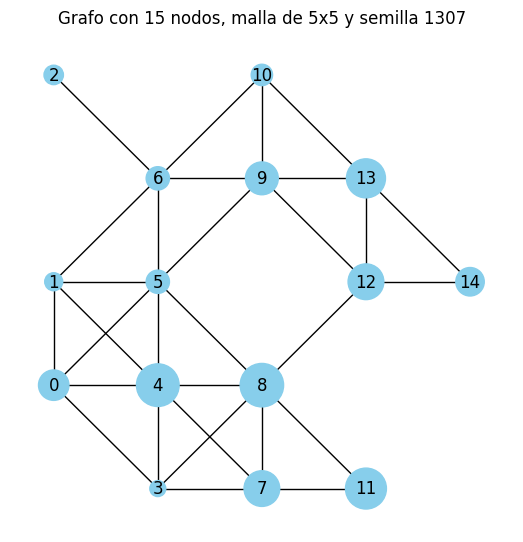

In [ ]:
import random
indice = random.randint(0, 13999)

np.random.seed(df_seeds.iloc[indice].seed)
n_nodos = df_seeds.iloc[indice].n_nodos
atoms_w = df_seeds.iloc[indice].atoms_w
atoms_l = df_seeds.iloc[indice].atoms_l
G, register = Graph_gen(n_nodos, atoms_w, atoms_l, scale)

# Dibujar el grafo
plt.figure(figsize=(atoms_w*1.3, atoms_l*1.3))
pos = nx.get_node_attributes(G, 'pos')
weight = nx.get_node_attributes(G, 'weight').values()
plt.title(f'Grafo con {n_nodos} nodos, malla de {atoms_w}x{atoms_l} y semilla {df_seeds.iloc[indice].seed}')
nx.draw(G, pos, with_labels=True, node_size=[v*1000 for v in weight], node_color='skyblue')
plt.show()

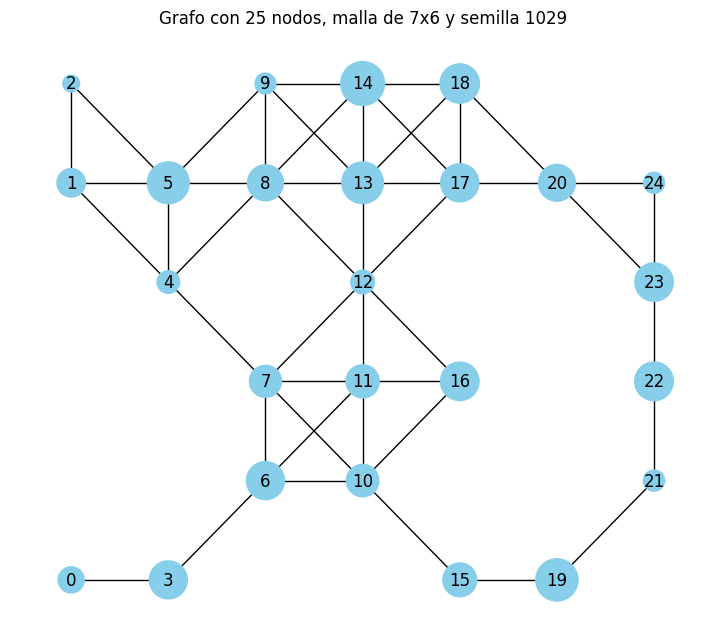

In [18]:
import random
indice = random.randint(0, 13999)

np.random.seed(df_seeds.iloc[indice].seed)
n_nodos = df_seeds.iloc[indice].n_nodos
atoms_w = df_seeds.iloc[indice].atoms_w
atoms_l = df_seeds.iloc[indice].atoms_l
G, register = Graph_gen(n_nodos, atoms_w, atoms_l, scale)

# Dibujar el grafo
plt.figure(figsize=(atoms_w*1.3, atoms_l*1.3))
pos = nx.get_node_attributes(G, 'pos')
weight = nx.get_node_attributes(G, 'weight').values()
plt.title(f'Grafo con {n_nodos} nodos, malla de {atoms_w}x{atoms_l} y semilla {df_seeds.iloc[indice].seed}')
nx.draw(G, pos, with_labels=True, node_size=[v*1000 for v in weight], node_color='skyblue')
plt.show()